# Categorical Data

Categorical data consider numerical values, (_i.e._ a quantitative variable), in the context of a category, (_i.e._ a qualitative variable).

Surveys, like the ones we see on the television show Family Feud, or say the frequency of people with various eye colors, are examples of categorical data. Categorical data can be visualized using bar graphs and pie charts, and in this section, we will practice making such visualizations.

Let's load the necessary libraries and read in the data.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

sns.set_style('whitegrid')

NorthAmerica_Military_USD_PercentGDP_Combined_csv = '''\
Year,CAN-PercentGDP,MEX-PercentGDP,USA-PercentGDP,CAN-USD,MEX-USD,USA-USD
1960,4.18525654,0.673508659,8.993124587,1.702442711,0.084,47.34655267
1961,4.128312243,0.651780326,9.1560315,1.677820881,0.0864,49.87977061
1962,3.999216389,0.689655172,9.331672945,1.671313753,0.0992,54.65094261
1963,3.620650112,0.718685832,8.831891186,1.610091701,0.112,54.56121578
1964,3.402062837,0.677506775,8.051281106,1.657457283,0.12,53.43232706
1965,2.930260659,0.591269841,7.587247177,1.57470454,0.1192,54.56179126
1966,2.683282422,0.576379066,8.435300286,1.614422827,0.1304,66.44275153
1967,2.74792677,0.545217107,9.417795933,1.775500366,0.1336,78.39844224
1968,2.54364188,0.548510764,9.268454275,1.797265817,0.1488,84.32903122
1969,2.27378467,0.600160043,8.633263795,1.770108751,0.18,84.99016543
1970,2.188979696,0.497411659,8.032743584,1.889157918,0.1768,83.407993
1971,2.131485639,0.48765558,6.943069609,2.077659711,0.1912,78.23797989
1972,2.011818438,0.536568089,6.519756924,2.233737031,0.2424,80.70807097
1973,1.832601818,0.544217687,5.893870591,2.363060955,0.3008,81.46979441
1974,1.783813085,0.565744137,5.954111197,2.809465529,0.4072,89.27892034
1975,1.863541853,0.57358422,5.622679096,3.18091549,0.5048,92.08092875
1976,1.765927978,0.598103574,5.191071429,3.581805735,0.531576968,94.71525108
1977,1.8057636,0.534256205,5.155617351,3.752174526,0.437692986,104.665219
1978,1.848887401,0.504834431,4.943087248,3.969158477,0.518287193,113.3820637
1979,1.711245918,0.505297474,4.951991535,4.084145738,0.679663588,126.8799271
1980,1.764448615,0.416107383,5.153537467,4.744402251,0.810422204,143.6883549
1981,1.709915638,0.513301014,5.646541256,5.141128191,1.284948561,176.5588753
1982,1.954343585,0.495419418,6.814057094,6.017321456,0.858130163,221.6735426
1983,2.081196249,0.522866314,6.32114426,6.947104072,0.778556797,223.427165
1984,2.117188855,0.65981906,6.23641653,7.349795764,1.155945373,245.1491683
1985,2.097376234,0.676313139,6.453219205,7.460563318,1.241863652,272.1632293
1986,2.109197118,0.634622463,6.626522658,7.78013674,0.817296612,295.5462238
1987,2.062576371,0.580341889,6.420274023,8.694447168,0.813391574,304.0866487
1988,1.986767119,0.536145374,6.071277702,9.897335684,0.981914646,309.6612693
1989,1.934614309,0.517255829,5.871206008,10.74713469,1.153375828,321.8665588
1990,1.958793742,0.433081035,5.605175294,11.41463185,1.210872502,325.129314
1991,1.895444339,0.435402301,4.883429398,11.3385033,1.459136041,299.3727791
1992,1.8616877,0.469454656,4.970466808,10.78880312,1.824550066,325.033736
1993,1.821753504,0.442785494,4.604350295,10.26882262,2.122980338,316.7194437
1994,1.696680257,0.518830327,4.215264675,9.57737764,2.635284079,308.084
1995,1.554090071,0.450891531,3.860245792,9.176903908,1.562615372,295.8530977
1996,1.403752581,0.476484778,3.554982206,8.615884471,1.882873103,287.9606687
1997,1.246243202,0.458095854,3.405562244,7.945140183,2.184061042,293.1678258
1998,1.256293902,0.450450487,3.201558499,7.748607984,2.263223453,290.9960551
1999,1.241703064,0.460988776,3.085676783,8.21077854,2.652912012,298.0948913
2000,1.11808088,0.44604782,3.112242147,8.299385231,3.031454509,320.0863242
2001,1.137368973,0.442657004,3.123809803,8.375571425,3.229469276,331.8056106
2002,1.120852292,0.421606002,3.447618099,8.495399281,3.172268734,378.4631388
2003,1.115878799,0.405916547,3.827161045,9.958245602,2.960496802,440.5320696
2004,1.107966027,0.364898723,4.016312736,11.33648983,2.854385965,492.9993762
2005,1.110669655,0.355958931,4.090034876,12.98813296,3.123454978,533.203
2006,1.125832408,0.311171936,4.041627237,14.8098928,3.035131019,558.335
2007,1.188901783,0.401163918,4.079655081,17.41713993,4.223037646,589.586
2008,1.248621382,0.390513227,4.463827356,19.3420584,4.334654124,656.756
2009,1.377555631,0.501556275,4.88559968,18.93622605,4.514233914,705.917
2010,1.194338338,0.452734493,4.922641677,19.31568883,4.789031339,738.005
2011,1.193291895,0.465777803,4.840173995,21.39372086,5.498458542,752.288
2012,1.118404598,0.475987281,4.477401219,20.45210711,5.717035575,725.205
2013,1.0023672,0.507919455,4.046678879,18.51573121,6.473144378,679.229
2014,0.989925299,0.513829957,3.69589465,17.85364048,6.758693845,647.789
2015,1.152709374,0.466676122,3.477845166,17.93764189,5.468837812,633.829639
2016,1.164161567,0.495064414,3.418942337,17.78277554,5.33687574,639.856443
2017,1.351602232,0.436510296,3.313381294,22.26969632,5.062076646,646.752927
2018,1.324681094,0.477517407,3.316248808,22.72932758,5.839521271,682.4914
2019,1.27894142,0.52348249,3.427080181,22.20440844,6.650808254,734.3441
2020,1.415055841,0.573651659,3.741160091,22.75484713,6.116376582,778.2322
'''

from io import StringIO

NorthAmerica_Military_USD_PercentGDP_Combined_file = StringIO(NorthAmerica_Military_USD_PercentGDP_Combined_csv)

military = pd.read_csv(NorthAmerica_Military_USD_PercentGDP_Combined_file, index_col='Year')

## Bar graphs

Bar graphs are a popular method to visualize categorical data. They're simple, concise, and can condense
large and complex datasets into a visual summary. Most bar graphs depict a categorical element as an
independent variable on the x-axis while the height of the bar corresponds to a numerical variable on the y-axis.

We will practice making bar graphs using our military dataset.

First, let's create a graph to examine the percent of the GDP (gross national product) spent on the military in Canada. We will look at the years 2018, 2019 and 2020.

To do this, we must extract the data for the years of interest from the column containing the data pertaining to GDP percentage of military spending in Canada. We will call this `can_gdp`.

In [2]:
can_gdp = military.loc[[2018, 2019, 2020], ['CAN-PercentGDP']]

can_gdp

,CAN-PercentGDP
Year,
2018,1.324681
2019,1.278941
2020,1.415056


The quickest way to generate a bar chart from the above DataFrame is via the `plot` property:

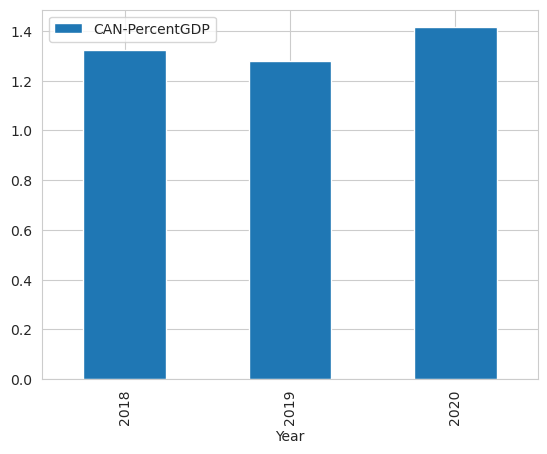

In [3]:
can_gdp.plot.bar();

We can do the same explicitly with matplotlib.

matplotlib doesn't automatically understand a multidimensional object like the DataFrame. So let's extract from our DataFrame its underlying data Series.

In [4]:
years = [2018, 2019, 2020]

can_gdp = military.loc[years, 'CAN-PercentGDP']

can_gdp

Year
2018    1.324681
2019    1.278941
2020    1.415056
Name: CAN-PercentGDP, dtype: float64

Then, we call the `plt.bar()` function to create a bar chart using this data.

The `plt.bar()` function needs two arguments. The first argument, `x`, is an array of values to be plotted on the x-axis. The second argument, `height`, determines the height of the bars (the y-values).

For now, we will create a list of our years as strings, to input as the first argument, and use the `can_gdp` Series as our second argument.

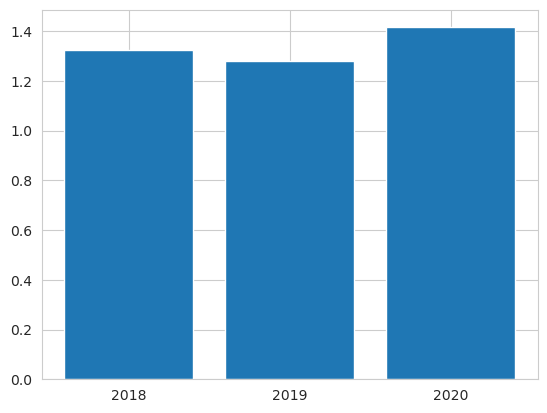

In [5]:
year_labels = [str(year) for year in years]

plt.bar(year_labels, can_gdp)

plt.show()

The above code produced a plot, but we've lost some useful labels; and, we could even improve on that. Descriptive labeling is important to help others to understand the data.

We need to add axis labels and a title to communicate what is being measured. Aesthetically, we can also reduce the width of each bar to give more room on the graph and more rest for our eyes.

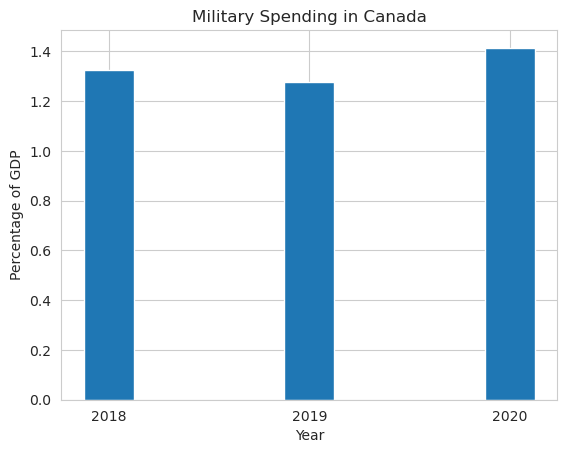

In [6]:
plt.bar(year_labels, can_gdp, width=0.25)

plt.title('Military Spending in Canada')

plt.ylabel('Percentage of GDP')
plt.xlabel('Year')

plt.show()

This plot looks better and is a lot more descriptive.

Let's add the data from Mexico and the United States.

To do this, we use the `plt.subplots()` function. This function creates a `figure` object and an `axis` object, which we will name `fig` and `ax`, respectively. Using this function, we can add data for Canada, Mexico and the United States to the same plot, within the boundaries of the same axes. We do this by calling `ax.bar()`.

Note: We want to group our bars by year. To do this we'll set precise positions on the x-axis.

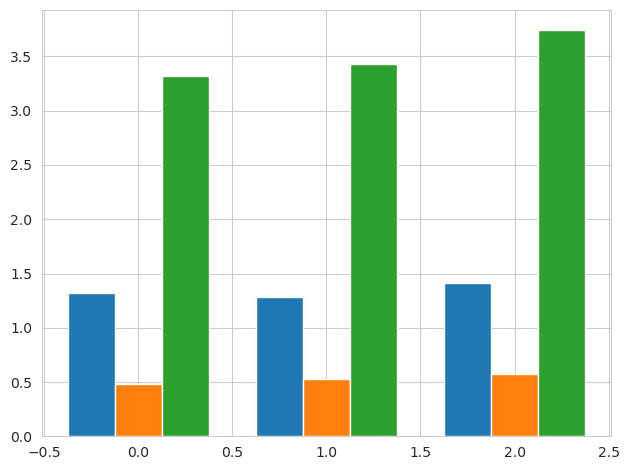

In [7]:
can_gdp = military.loc[years, 'CAN-PercentGDP']
mex_gdp = military.loc[years, 'MEX-PercentGDP']
usa_gdp = military.loc[years, 'USA-PercentGDP']

index = np.arange(len(years))

(fig, ax) = plt.subplots()

ax.bar(index - 0.25, can_gdp, width=0.25)

ax.bar(index, mex_gdp, width=0.25)

ax.bar(index + 0.25, usa_gdp, width=0.25)

plt.tight_layout()

plt.show()

We were able to create a bar plot with all three data sets together. Now, let's add the appropriate titles, axis labels, and other details.

To add a title to the entire graph, we can call the `plt.title()` function, just as we did before.

In a subplot, to add axis labels, we have to use the `set_xlabel()` and `set_ylabel()` methods on the axis object, here `ax`.

We can also label each individual bar with the associated numerical value by calling the `bar_label()` method on `ax`. In order to label the bars, the label must be specified when creating each each bar.

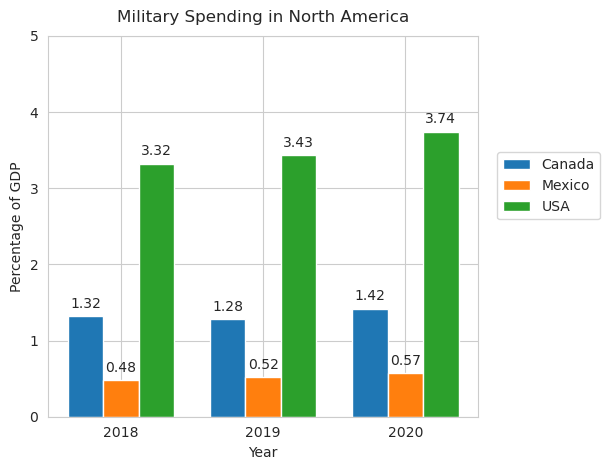

In [8]:
(fig, ax) = plt.subplots()

# round(decimals=2): rounds to 2 places after decimal

can_bar = ax.bar(index - 0.25, can_gdp.round(decimals=2), width=0.25, label='Canada') 
mex_bar = ax.bar(index, mex_gdp.round(decimals=2), width=0.25, label='Mexico')
usa_bar = ax.bar(index + 0.25, usa_gdp.round(decimals=2), width=0.25, label='USA')

# Add labels, title, custom x-axis tick labels, etc.

plt.title("Military Spending in North America", pad=10)

ax.set_ylabel('Percentage of GDP')
ax.set_xlabel('Year')

ax.set_xticks(index, years)

ax.bar_label(can_bar, label_type="edge", padding=4)
ax.bar_label(mex_bar, label_type="edge", padding=4)
ax.bar_label(usa_bar, label_type="edge", padding=4)

ax.legend(loc=4, bbox_to_anchor=(1.3, 0.5))

plt.ylim(0, 5)

plt.tight_layout()

plt.show()

Great! Now we have a well annotated, visually appealing graph that depicts an important message about the data: the percentage of the GDP spent on the military for each country for the years 2018-2020.

From this graph, we can easily see that during this time period, Canada and Mexico contribute a smaller proportion of their GDP to military spending than the United States. This may not have been easily discernable by just looking at our large data table. 

## Pie charts

Pie charts are a commonly used visualization method to represent proportions in datasets. Pie charts use *wedges* to represent the numerical value of a proportion corresponding to a categorial variable.

While pie charts are very common and can be easily interpreted by a layperson audience, they may not be the best way to represent data in certain cases. Firstly, because pie charts use the area of a circle to represent the proportion of a categorical variable, it can be difficult to gauge the numerical value that a wedge represents if the area doesn't appear as an easily discernible fraction (_e.g._ ½, ⅓, ¼). This can be aided with the help of labels and legends that explicitly show the numerical values associated with the wedges of the pie chart. Secondly, if you want to visualize many categorical variables or variables that make up a significantly small proportion of the dataset, it may be difficult to see the variable on a pie chart. Overall, pie charts can be a simple and effective way to communicate proportional categorical data, but before using them, consider what attributes of the data need to be highlighted to help decide if a pie chart is the most appropriate visualization method. 

Now, let's look at the total amount of money spent on the military in the entire North American continent for the year of 2000 and determine what proportion of this total amount came from each country. Because we are looking at a single year (2000), a pie chart is a good way to visualize the proportions of military spending contributed by each country. To do this, we will need to extract data for the year 2000; we'll call it `usd_2000`. Then, we will  make a pie chart using the `plt.pie()` function. We will use `usd_2000` to determine the wedge sizes and the argument `normalize=True` to normalize the data to 1. We'll also set the figure size, in inches, using `plt.figure()`.

In [9]:
usd_2000 = military.loc[2000, ['CAN-USD', 'MEX-USD', 'USA-USD']]

usd_2000

CAN-USD      8.299385
MEX-USD      3.031455
USA-USD    320.086324
Name: 2000, dtype: float64

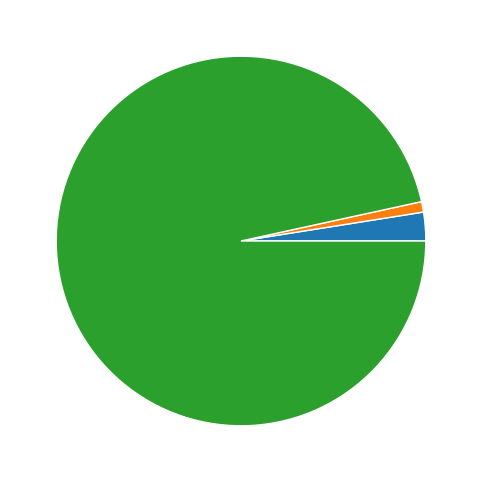

In [10]:
plt.figure(figsize=(10, 6))

plt.pie(usd_2000, normalize=True);

Now that we have a pie chart, let's add some more detail to it to make it more descriptive.

We can label the sectors of the chart so that we know which country corresponds to which color. Likewise, we can label the percentage of each sector to know the definitive proportion of each country's contribution to the total amount of money spent on the military in North America.

To do this, we will create a list called `countries`,  containing the strings "Canada", "Mexico", and "USA". We then assign the `labels` argument within `plt.pie()` to `countries` and add the `autopct` argument, which labels the wedges using the printf style format. More information on that format is linked at the end of this section.

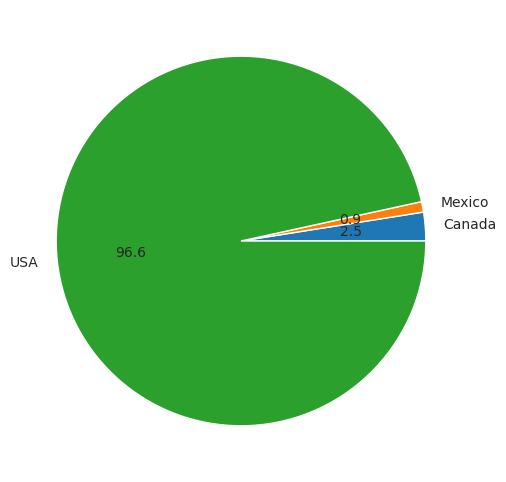

In [11]:
plt.figure(figsize=(10, 6))

countries = ['Canada', 'Mexico', 'USA']

plt.pie(usd_2000, normalize=True, labels=countries, autopct='%.1f')

plt.show()

This plot is okay, but it can be better.

Because the sectors of Mexico and Canada are a lot smaller than the sector for the United States, overlaying the percentages on top of the sector creates spatial issues that can be visually displeasing. Instead, let's add the percentages into a legend along with the labels of each sector. Let's also add a title so others can know what they are looking at when they view this chart.

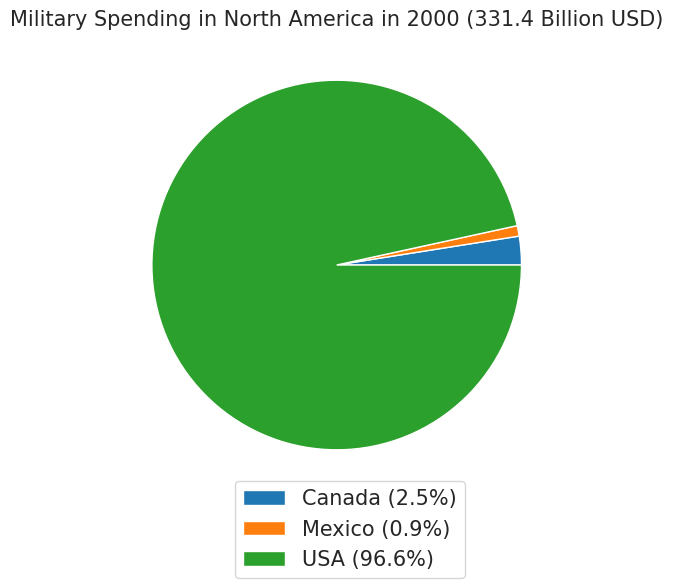

In [12]:
total = usd_2000.sum()

percentages = 100 * usd_2000 / total

labels = [
    f'{country} ({percentage:.1f}%)'
    for (country, percentage) in zip(countries, percentages)
]

plt.figure(figsize=(10, 6))

(patches, text) = plt.pie(usd_2000, normalize=True)

plt.legend(patches, labels, loc=4, bbox_to_anchor=(0.8, -0.2), fontsize=15)

plt.title(f"Military Spending in North America in 2000 ({total:.1f} Billion USD)",
          loc='center',
          fontsize=15)

plt.show()

Above, we used `plt.pie()` in a way that we had not used it before.

Under the hood, the `plt.pie()` function returns two default outputs, which we named: `patches` and`text`. `patches` is an object that dictates the size of each wedge. `text` consists of a list of labels for our data. Here, we needed to specifically assign `patches` and `text` objects so we could use `patches` as an argument for the `plt.legend()` function. 

The `plt.legend()` function has two required arguments.

The first argument dictates **what** is being labeled. In our case, the wedges of the pie chart (*i.e.* the `patches` object) are being labeled.

The second argument dictates **how** things are labeled. Here, we simply created a variable called labels, which consists of the three strings:

In [13]:
labels

['Canada (2.5%)', 'Mexico (0.9%)', 'USA (96.6%)']

The other arguments, `bbox_to_anchor` and `fontsize`, are optional when using the `plt.legend()` function.

The argument `bbox_to_anchor` designates the position in the plotting area where the legend will be, while the `fontsize` argument dictates the font size, in points, of the legend text.

## Conclusions

In this section, we were introduced to the `plt.bar()` and `plt.pie()` functions to construct bar plots and pie charts, respectively.

The `plt.bar()` function requires `x` and `height` arguments, which can be an array of number values, but other parameters can be included.

The `plt.pie()` function only requires an `x` argument as an array of values and has other arguments that can be included as well.

Both of these types of visualizations are used for depicting categorical data.

As a reminder, when deciding on whether to use a pie chart, consider certain attributes of the data, such as the number of categorical variables or the size of the proportions to be plotted. Below is a list of functions with linked documentation for your reference and further reading:

- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html">plt.bar()</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html">plt.pie()</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html">plt.subplots()</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html">plt.title()</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html">plt.ylim()</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html">plt.xlim()</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html">plt.ylabel()</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html">plt.xlabel()</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar.html">ax.bar()</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html">ax.legend()</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html">plt.tight_layout()</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html">plt.figure()</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html">plt.show()</a>
- <a target="_blank" href="https://docs.python.org/3/tutorial/inputoutput.html#formatted-string-literals">Formatted String Literals</a>